**telegram**:

Часть 1: изучить представленные датасеты, избавиться от дубликатов и склеить информацию в одну таблицу <br>
Часть 2: построить Streamlit-приложение с разведочным анализом данных

**collab**:

Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться <ins>дубли</ins>, <ins>некорректно заполненные значения</ins> или <ins>значения, противоречащие друг другу</ins>. Для получения качественной модели необходимо <ins>предварительно очистить датасет</ins> от такой информации.

Задание 1. <br>
Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

Задание 2. <br>
При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:
построение графиков распределений признаков
построение матрицы корреляций
построение графиков зависимостей целевой переменной и признаков
вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
любые другие ваши идеи приветствуются!

**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display

In [2]:
!ls datasets_hw1/

D_clients.csv     D_last_credit.csv D_salary.csv
D_close_loan.csv  D_loan.csv        D_target.csv
D_job.csv         D_pens.csv        D_work.csv


In [3]:
dir_ = 'datasets_hw1'

dataframes = {}
for filename in os.listdir(dir_):
    df_name = filename.replace('D_', '').removesuffix('.csv')
    file_path = os.path.join(dir_, filename)
    df = pd.read_csv(file_path)
    globals()[df_name] = dataframes[df_name] = pd.read_csv(file_path)

---

**Справочники**:
* `work` - трудоустройство (раб/не раб/неизв)
* `pens` - пенсионер

**Фактовые таблицы**:
* `target` (agreement) - отклики клиентов на компанию (client -> target)
* `last_credit` - последний займ (client -> credit + fst_payment + term)
* `close_loan` - статусы кредитов (loan -> is_closed)

**EM таблицы**:
* `salary` - доход (client -> income [personal + family])
* `job` - работа (client -> industry + title + department + work_time [months])
* `clients` - клиенты (client -> ...)

**Others**:
* `loan` - link (loan <-> client)

Нет смысла проверять справочниики, разве что за орфографией.

Что стоит проверить в остальных таблицах:
* Ограничения целостности
    * Дубликаты (записали два раза - например, читали из кафки). Как полные, так и по ключу.
    * FK - ссылки на измерения и справочники существующие.
* Пропущенные значения.
* Ошибки ввода данных, которые ведут к нарушению бизнес-логики, выбросам и другим неприятным последствиям, которые не позволят, например, сделать нам построить качественную модель (ап-лифт? вроде так называется).]

Сначала можем пройтись по каждой табличке в частности, а потом посмотреть на итоговую таблицу, в которую уже сведем все измерения.

## Data processing + EDA

In [4]:
for df_name, df in dataframes.items():
    df.columns = [col.lower() for col in df.columns]

In [5]:
def find_duplicates(df: pd.DataFrame, 
                         key_cols: list[str],
                         return_bool: bool) -> pd.DataFrame | bool:
    dups = df[df.duplicated(subset=key_cols, keep='first')]
    if return_bool:
        return not dups.empty
    return dups

def drop_duplicates(df: pd.DataFrame, key_cols: list[str]):
    return df.drop_duplicates(subset=key_cols, keep='first')

In [6]:
def find_missing_values(df: pd.DataFrame,
                        return_bool: bool) -> pd.DataFrame | bool:
    missing_data = df.loc[df.isna().any(axis=1), :]
    if return_bool:
        return not missing_data.empty
    return missing_data

---

###### loan

In [139]:
print(loan.shape);
loan.head()

(21126, 2)


,id_loan,id_client
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373


Надо запомнить, что долгов у нас 21к+. Посмотрим потом, сколько долгов будет в других измерениях + сколько клиентов (вероятно, клиенты брали не по одному долгу).

Проверим на дубли.

In [140]:
find_duplicates(loan, ['id_loan', 'id_client'], True)

False

Проверим также на пропущенные значения.

In [141]:
find_missing_values(loan, True)

False

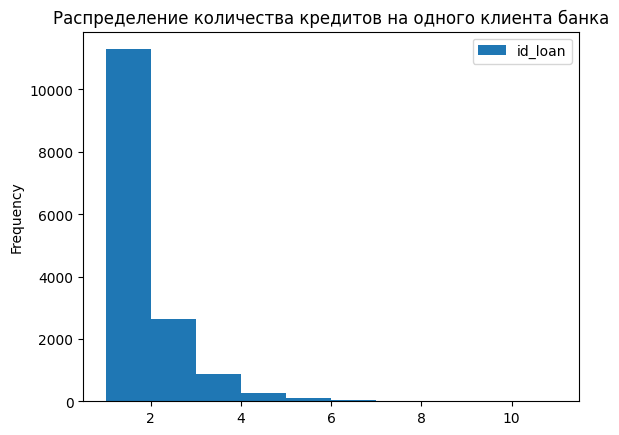

In [142]:
(
    loan
    .groupby('id_client')
    .count()
    .sort_values('id_loan', ascending=False)
    .plot(kind='hist', title='Распределение количества кредитов на одного клиента банка')
);

Как можно заметить, в основном клиенты банка берут по 1-4 кредита и существенно реже больше.

---

###### target

In [143]:
print(target.shape);
target.head()

(15223, 3)


,agreement_rk,id_client,target
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0


Клиентов, попавших под коммуникацию банка, 15к+. Запомнили.

In [144]:
print(find_duplicates(target, ['agreement_rk'], True))
print(find_duplicates(target, ['id_client', 'target'], True))

False
False


In [145]:
find_missing_values(target, True)

False

In [146]:
(
    target
    .groupby('target')
    .count()
    .drop('agreement_rk', axis=1)
    .rename({'id_client': 'was_affected'}, axis=1)
     / target.shape[0] * 100
).round(2)

,was_affected
target,
0,88.1
1,11.9


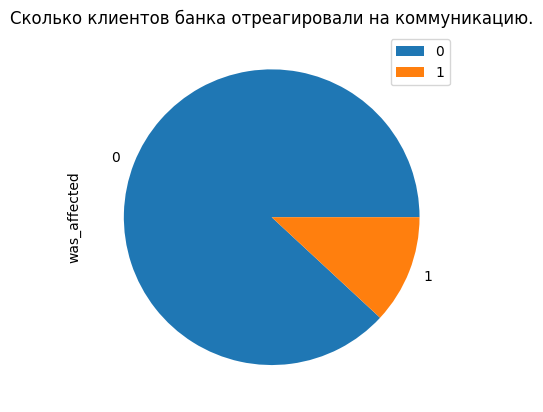

In [147]:
(
    target
    .groupby('target')
    .count()
    .drop('agreement_rk', axis=1)
    .rename({'id_client': 'was_affected'}, axis=1)
    .reset_index()
    .plot(kind='pie', y='was_affected', title='Сколько клиентов банка отреагировали на коммуникацию.')
);

Примерно 12% клиентов, которым были посланы коммуникации, откликнулись на предложение.

---

###### last_credit

In [148]:
print(last_credit.shape);
last_credit.head()

(15223, 4)


,credit,term,fst_payment,id_client
0,8000.00,6,8650.0,106804370
1,21650.00,6,4000.0,106804371
2,33126.00,12,4000.0,106804372
3,8491.82,6,5000.0,106804373
4,21990.00,12,4000.0,106804374


In [149]:
find_duplicates(last_credit, 
                ['credit', 'term', 'fst_payment', 'id_client'], 
                True)

False

In [150]:
find_missing_values(last_credit, True)

False

**NOTE**: Уже что в первой строчке вижу, что первоначальный взнос почему-то больше кредита...

In [151]:
tmp = last_credit[last_credit.fst_payment > last_credit.credit]
tmp['over'] = np.round(tmp.fst_payment.values / tmp.credit.values - 1, 2)

display(tmp.sort_values('over', ascending=False).head())
print(f"Количество кредитов c первым платежом больше самого кредита: {tmp.shape[0]}")

/var/folders/2b/lvzfswdd24386xpkdstxhk6c0000gn/T/ipykernel_94592/1336226138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['over'] = np.round(tmp.fst_payment.values / tmp.credit.values - 1, 2)


,credit,term,fst_payment,id_client,over
1636,3541.0,3,24000.0,106806006,5.78
11061,3140.0,3,18850.0,106815431,5.00
1889,2045.0,3,11900.0,106806259,4.82
1906,3999.0,3,23000.0,106806276,4.75
1871,8990.0,3,50000.0,106806241,4.56


Количество таких кредитов: 495


In [7]:
tmp = last_credit[last_credit.fst_payment == last_credit.credit]
print(f"Количество кредитов c первым платежом равным кредиту: {tmp.shape[0]}")

Количество кредитов c первым платежом равным кредиту: 93


Ну такого точно не должно быть. Даже если это не взнос, а первый платеж. Кредиты часто закрываются раньше, но не первым же платежом. Ну и тем более платежи больше самого кредита. Не говоря уже о том, что если это именно взносы, то уж никакой банк не будет заключать кредиты со взносом >= сумме кредита.

Предлагаю оставить только те кредиты, где первый платеж/взнос меньше кредита.

In [8]:
last_credit = last_credit[last_credit.fst_payment < last_credit.credit]
last_credit.shape

(14635, 4)

---

###### close loan

In [154]:
display(close_loan.shape)
display(close_loan.head())

(21126, 2)

,id_loan,closed_fl
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1


In [155]:
find_missing_values(close_loan, True)

False

In [156]:
find_duplicates(close_loan, ['id_loan'], True)

False

In [157]:
(
    close_loan
    .groupby('closed_fl')
    .count()
    .rename({'id_loan': 'was_closed'}, axis=1)
     / close_loan.shape[0] * 100
).round(3)

,was_closed
closed_fl,
0,45.82
1,54.18


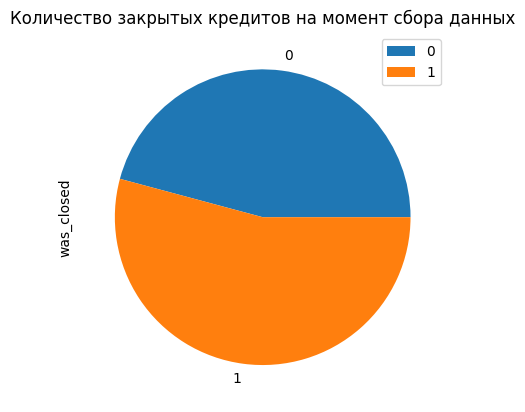

In [158]:
(
    close_loan
    .groupby('closed_fl')
    .count()
    .rename({'id_loan': 'was_closed'}, axis=1)
    .reset_index()
    .plot(kind='pie', y='was_closed', title='Количество закрытых кредитов на момент сбора данных')
);

Получается на данный момент около 54% долгов закрыты. Остальные, видимо, еще действующие или уже списаны.

---

###### salary

In [207]:
display(salary.shape)
display(salary.head())

(15523, 3)

,family_income,personal_income,id_client
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


In [208]:
find_missing_values(salary, True)

False

In [209]:
find_duplicates(salary, ['id_client'], True)

True

**NOTE**: Нашли дубликаты. Полные или только по ключу?

In [210]:
(
    find_duplicates(salary, ['id_client'], False)
    .equals(
        find_duplicates(salary, 
                        ['id_client', 'personal_income', 'family_income'], 
                        False)
    )
)

True

In [211]:
print(f"Количество дублей в таблице 'salary' = {find_duplicates(salary, ['id_client'], False).shape[0]}")

Количество дублей в таблице 'salary' = 300


300 дубликатов, причем полных. Можно списать на какой-нибудь забагованный ETL-процесс. <br>
Думаю, надо определенно удалять - пользы не несут, при этом при джойне еще замножатся строки + плохо повлияет на модель.

In [9]:
salary = drop_duplicates(df=salary, key_cols=['id_client'])
salary.shape

(15223, 3)

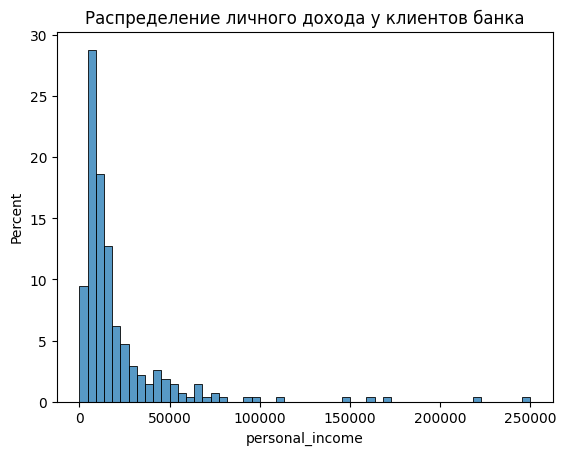

In [10]:
sns.histplot(
    data=salary
    .groupby('personal_income')
    .count()
    .drop('id_client', axis=1)
    .reset_index(),
    x='personal_income',
    stat='percent',
)
plt.title('Распределение личного дохода у клиентов банка')
plt.show();

Видно, что в основном личный доход клиентов сконцентрирован на значениях 0-50к с уклоном в 15-20к. Хвост распределения попадает на диапазон 50-150к и также еще выбросы от 150к и выше.

In [214]:
(
    salary
    .groupby('family_income')
    .count()
    .drop('id_client', axis=1)
    .rename({'personal_income': 'freq (%)'}, axis=1)
    / salary.shape[0] * 100
).round(3)

,freq (%)
family_income,
до 5000 руб.,0.394
от 10000 до 20000 руб.,46.489
от 20000 до 50000 руб.,39.953
от 5000 до 10000 руб.,9.932
свыше 50000 руб.,3.232


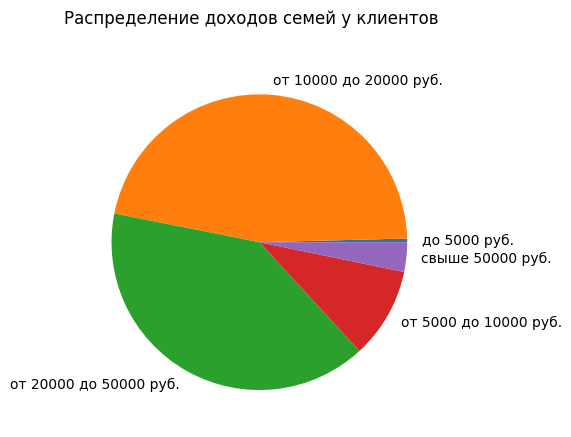

In [217]:
(
    salary
    .groupby('family_income')
    .count()
    .drop('id_client', axis=1)
    .rename({'personal_income': ' '}, axis=1)
    / salary.shape[0]
).plot(kind='pie', subplots=True, legend=False, title='Распределение доходов семей у клиентов');

Видно, что по доходам семей все получается примерно также - основная масса распределения лежит в диапазоне от 10 до 50к, на остальное приходится менее 15% распределения.

**NOTE**: Посмотрим еще на ошибки. Есть ли клиенты, у которых личный доход больше дохода семьи?

In [13]:
_ = salary['family_income'].apply(lambda x: x.split(' ')[-2]).astype(int)
display(salary[salary.personal_income > _].head())
print(f"Количество клиентов с личным доходом больше семейного дохода: {salary[salary.personal_income > _].shape[0]}")

,family_income,personal_income,id_client
245,от 5000 до 10000 руб.,13000.0,106814474
339,от 10000 до 20000 руб.,70000.0,106817153
432,от 20000 до 50000 руб.,60000.0,106810296
556,свыше 50000 руб.,60000.0,106810874
758,до 5000 руб.,25000.0,106805660


Количество клиентов с личным доходом больше семейного дохода: 108


По моей логике доход члена семьи не может быть больше дохода всей семьи. Либо снова ошибка с загрузкой данных в хранилище, либо ошибки при заполнении клиентами персональной анкеты.

Энивей, если мы потом собираемся строить модель на таких данных, то лучше тоже дропнуть.

In [14]:
salary = salary[salary.personal_income <= _]
salary.shape

(15115, 3)

---

###### job

In [222]:
display(job.shape)
display(job.head())

(15223, 5)

,gen_industry,gen_title,job_dir,work_time,id_client
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374


In [223]:
find_duplicates(tmp, ['id_client'], True)

False

In [224]:
find_missing_values(job, True)

True

**NOTE**: Нашли пропущенные значения. Полностью NULL записи или какие-то отдельные значения?

In [174]:
find_missing_values(job, False)

,gen_industry,gen_title,job_dir,work_time,id_client
16,NaN,NaN,NaN,NaN,106804386
29,NaN,NaN,NaN,NaN,106804399
40,NaN,NaN,NaN,NaN,106804410
43,NaN,NaN,NaN,NaN,106804413
53,NaN,NaN,NaN,NaN,106804423
...,...,...,...,...,...
15185,NaN,NaN,NaN,NaN,106819555
15191,NaN,NaN,NaN,NaN,106819561
15196,NaN,NaN,NaN,NaN,106819566
15197,NaN,NaN,NaN,NaN,106819567


Получается, по каким-то клиентам инфы нет совсем. Кажется, что не должно на что-либо повлиять. Можно дропнуть, можно оставить. В конце концов при джойне все равно эти колонки будут и значения будут null, поэтому смысла дропать не вижу.


Но для целей анализа эти данные уберем, чтобы не мешались.

In [175]:
tmp = job[~job.isna().any(axis=1)]
tmp.work_time = tmp.work_time.astype(int)

tmp.head()

/var/folders/2b/lvzfswdd24386xpkdstxhk6c0000gn/T/ipykernel_94592/2733981275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.work_time = tmp.work_time.astype(int)


,gen_industry,gen_title,job_dir,work_time,id_client
0,Торговля,Рабочий,Вспомогательный техперсонал,18,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101,106804374


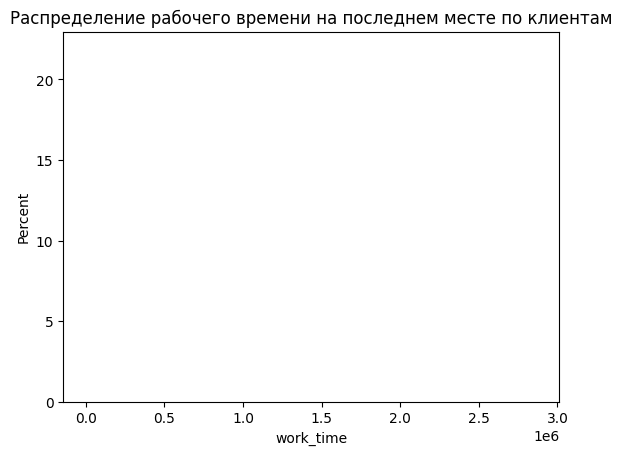

In [225]:
sns.histplot(
    data=tmp
    .groupby('work_time')
    .count()
    .drop(['gen_title', 'job_dir', 'id_client'], axis=1)
    .rename({'gen_industry': 'freq'}, axis=1)
    .reset_index(),
    x='work_timea',
    stat='percent',
);
plt.title('Распределение стажа на последнем месте по клиентам')
plt.show();

Получается достаточно странный график. Похоже на выбросы. Идем разбираться.

In [185]:
(
    tmp
    .groupby('work_time')
    .count()
    .drop(['gen_title', 'job_dir', 'id_client'], axis=1)
    .rename({'gen_industry': 'freq'}, axis=1)
    .reset_index()
)

,work_time,freq
0,1,28
1,2,40
2,3,134
3,4,119
4,5,84
...,...,...
297,1500,1
298,3500,1
299,4320,1
300,10000,1


**NOTE**: Внизу датафрейма видны какие-то явные ошибки, потому что 1500 месяцев - это 125 лет работы, не говоря про значения больше. Ограничим работу на одном месте в 60 лет.

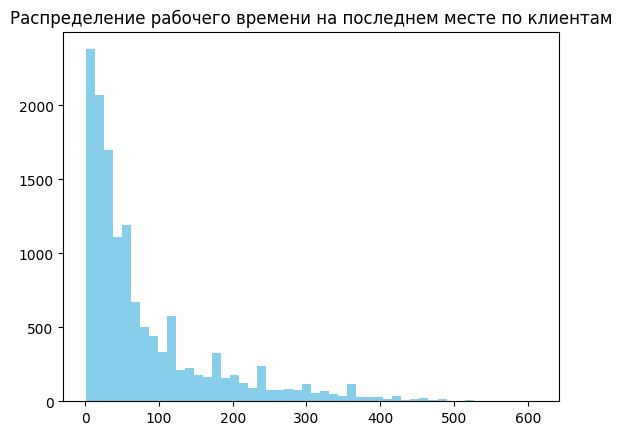

In [227]:
_ = (
    tmp
    .loc[tmp.work_time < 60 * 12, :]
    .groupby('work_time')
    .count()
    .drop(['gen_title', 'job_dir', 'id_client'], axis=1)
    .rename({'gen_industry': 'freq'}, axis=1)
    .reset_index()
)

plt.hist(_['work_time'], weights=_['freq'], color='skyblue', bins=50);
plt.title('Распределение стажа на последнем месте по клиентам (truncate 60 лет')
plt.show();

Все равно присутствуют выбросы в районе 600 (оно и понятно). Можно попытаться сделать график более детализированным, ограничившись максимальным стажем в 30 лет на одном месте (что, на самом деле, и более реалистично).

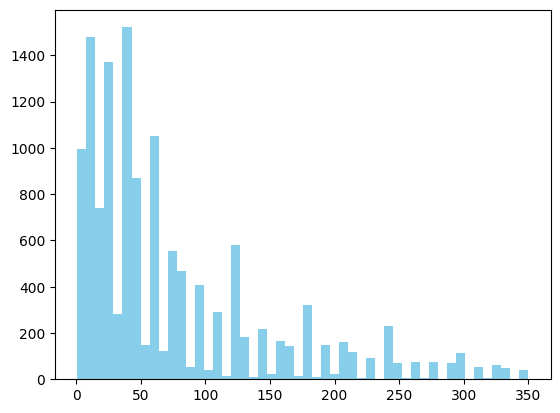

In [123]:
_ = (
    tmp
    .loc[tmp.work_time < 30 * 12, :]
    .groupby('work_time')
    .count()
    .drop(['gen_title', 'job_dir', 'id_client'], axis=1)
    .rename({'gen_industry': 'freq'}, axis=1)
    .reset_index()
)

plt.hist(_['work_time'], weights=_['freq'], color='skyblue', bins=50);
plt.title('Распределение стажа на последнем месте по клиентам (truncate 30 лет')
plt.show();

Здесь (на следующем графике) можно заметить, что частоты, кратные 6 месяцам, представляют собой пики распределения. Вряд ли это связано с желанием уйти из компании ровно в 1.5 года или 3 года работы. Вероятно респонденты предпочитают округлять свой стаж до ближайшего целого полугода, чтобы не вдаваться в детали.

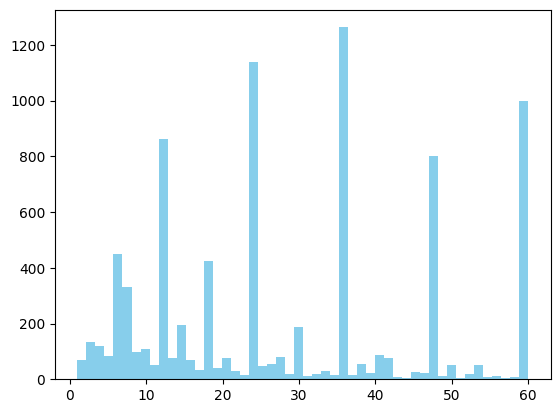

In [125]:
_ = (
    tmp
    .loc[tmp.work_time <= 5 * 12, :]
    .groupby('work_time')
    .count()
    .drop(['gen_title', 'job_dir', 'id_client'], axis=1)
    .rename({'gen_industry': 'freq'}, axis=1)
    .reset_index()
)

plt.hist(_['work_time'], weights=_['freq'], color='skyblue', bins=50);
plt.title('Распределение стажа на последнем месте по клиентам (truncate 5 лет')
plt.show();

Почистим датафрейм на более менее реалистичные цифры стажа. Ограничим его 60 лет.

In [15]:
job = job.loc[job.work_time <= 60 * 12, :]
job.shape

(13842, 5)

In [16]:
(
    tmp
    .gen_title
    .value_counts()
).plot(kind='pie', title='Распределение по названию должности');

AttributeError: 'DataFrame' object has no attribute 'gen_title'

Немношк налезло, но в целом разобрать можно. В основном все специалисты/рабочие, видимо также из простоты выбора (потому что работников в сфере услуг в развивающейся/развитой экономике должно быть по идее побольше). Ну и понятно, что руководителей меньше по количеству, чем линейного персонала.

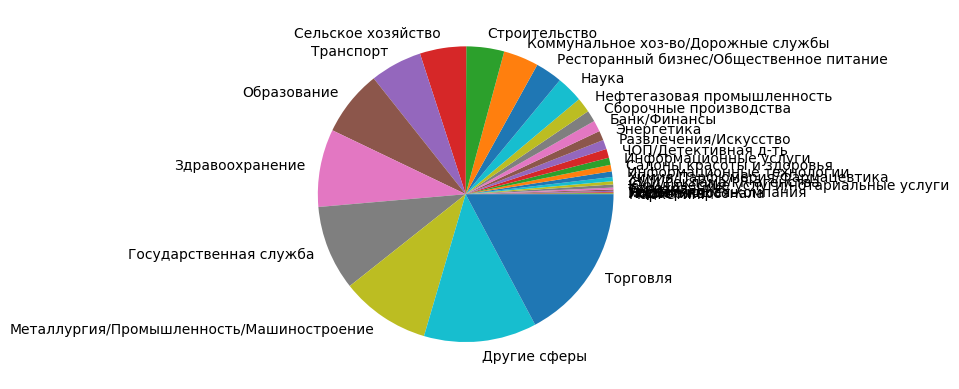

In [127]:
(
    tmp
    .groupby('gen_industry')
    .count()
    .drop(['gen_title', 'job_dir', 'id_client'], axis=1)
    .sort_values('work_time')
    .rename({'work_time': ''}, axis=1)
).plot(kind='pie', subplots=True, legend=False, title='Распределение по индустрии');

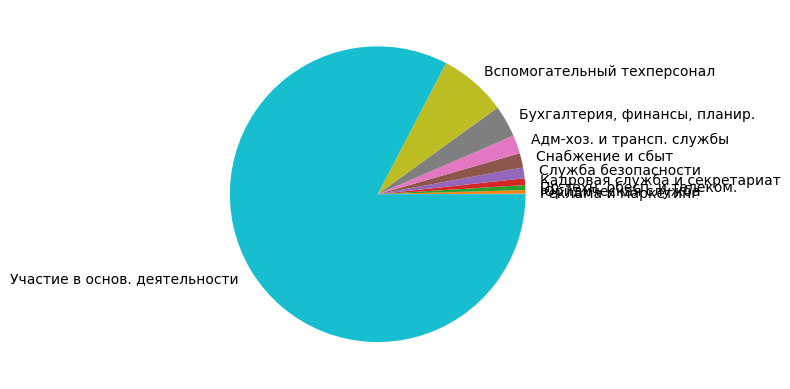

In [128]:
(
    tmp
    .groupby('job_dir')
    .count()
    .drop(['gen_title', 'gen_industry', 'id_client'], axis=1)
    .sort_values('work_time')
    .rename({'work_time': ''}, axis=1)
).plot(kind='pie', subplots=True, legend=False, title='Распределение по направлению деятельност');

Примерно такое разбиение по сферам и типу персонала. Не знаю, зачем это здесь, но пусть будет.

---

###### clients

Описание данных клиентов:

* ID — идентификатор записи;
* AGE — возраст клиента;
* GENDER — пол клиента (1 — мужчина, 0 — женщина);
* EDUCATION — образование;
* MARITAL_STATUS — семейное положение;
* CHILD_TOTAL — количество детей клиента;
* DEPENDANTS — количество иждивенцев клиента;
* SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
* SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
* REG_ADDRESS_PROVINCE — область регистрации клиента;
* FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
* POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
* FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
* OWN_AUTO — количество автомобилей в собственности.

In [177]:
display(clients.shape)
display(clients.head())

(16000, 14)

,id,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


In [178]:
find_missing_values(clients, True)

False

In [179]:
find_duplicates(clients, ['id'], True)

False

Пошли исследовать данные.

Первый вопрос - зачем нам `work` и `pens`, если у нас уже есть эти признаки в таблице? Видимо не нужны.

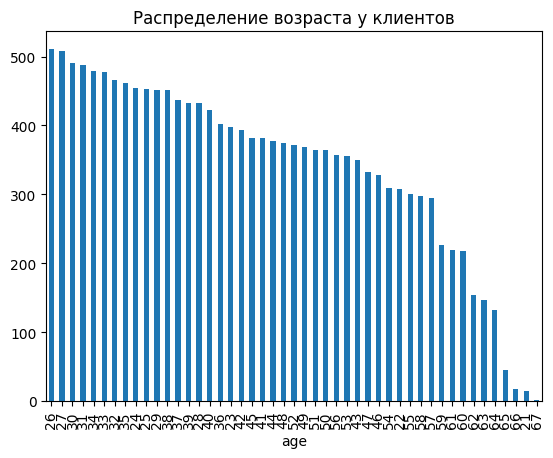

In [18]:
(
    clients
    .age
    .value_counts()
    .plot(kind='bar', title='Распределение возраста у клиентов')
);

Наблюдается красивая убывающая линия по возрасту клиентов.

Можно так еще много строить графиков, но лучше уже все поджойнить и смотреть в совокупности. <br>
В этой таблице клиентов, чем есть, например, в salary. Поэтому у нас будут пропущенные значения в итоговом датафрейме.

### Джойним все таблички

Важно здесь правильно поджойнить.

Где-то в данных были пропущенные значения, где-то мы избавились от данных сами. В первом случае надо сделать right join, во втором inner.

In [19]:
df = (
    pd.merge(clients, target.drop('agreement_rk', axis=1), left_on='id', right_on='id_client', how='left')
    .drop('id', axis=1)
)
df = pd.merge(df, job, how='inner')
df = pd.merge(df, salary, how='inner')
df = pd.merge(df, last_credit, how='inner')
df = pd.merge(df, loan, how='left')
df = pd.merge(df, close_loan, how='left')


display(df.shape)
display(df.head())

(18500, 26)

,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,...,gen_title,job_dir,work_time,family_income,personal_income,credit,term,fst_payment,id_loan,closed_fl
0,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,...,Работник сферы услуг,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,5588.0,6,1000.0,1753791446,0
1,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,...,Специалист,Участие в основ. деятельности,5.0,от 10000 до 20000 руб.,10000.0,19498.0,12,0.0,1753796120,0
2,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,...,Руководитель высшего звена,Участие в основ. деятельности,360.0,от 20000 до 50000 руб.,30000.0,15470.0,3,15000.0,1753792244,1
3,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,...,Специалист,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,13960.0,6,2500.0,1753795547,0
4,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,...,Специалист,Участие в основ. деятельности,12.0,от 10000 до 20000 руб.,15000.0,11890.0,6,8000.0,1753802107,1


In [20]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18500 entries, 0 to 18499
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      18500 non-null  int64  
 1   gender                   18500 non-null  int64  
 2   education                18500 non-null  object 
 3   marital_status           18500 non-null  object 
 4   child_total              18500 non-null  int64  
 5   dependants               18500 non-null  int64  
 6   socstatus_work_fl        18500 non-null  int64  
 7   socstatus_pens_fl        18500 non-null  int64  
 8   reg_address_province     18500 non-null  object 
 9   fact_address_province    18500 non-null  object 
 10  postal_address_province  18500 non-null  object 
 11  fl_presence_fl           18500 non-null  int64  
 12  own_auto                 18500 non-null  int64  
 13  id_client                18500 non-null  float64
 14  target                

In [21]:
df.describe()

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,fl_presence_fl,own_auto,id_client,target,work_time,personal_income,credit,term,fst_payment,id_loan,closed_fl
count,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,1.850000e+04,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,1.850000e+04,18500.000000
mean,39.020486,0.642811,1.114649,0.723730,0.999243,0.054000,0.323405,0.133892,1.068129e+08,0.122108,85.548108,13918.372071,14811.682771,8.248432,3031.101949,1.753801e+09,0.537730
std,10.582671,0.479184,0.956139,0.825789,0.027500,0.226024,0.467789,0.340704,4.333092e+03,0.327419,90.708018,7224.687187,11946.547379,4.142054,4531.571823,6.084642e+03,0.498588
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.068044e+08,0.000000,1.000000,24.000000,2000.000000,3.000000,0.000000,1.753791e+09,0.000000
25%,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.068092e+08,0.000000,24.000000,9000.000000,6500.000000,6.000000,1000.000000,1.753796e+09,0.000000
50%,38.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.068140e+08,0.000000,50.000000,12000.000000,11740.000000,6.000000,2000.000000,1.753801e+09,1.000000
75%,47.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.068163e+08,0.000000,120.000000,17000.000000,19700.000000,10.000000,3500.000000,1.753806e+09,1.000000
max,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,1.068196e+08,1.000000,612.000000,50000.000000,119700.000000,36.000000,75606.000000,1.753812e+09,1.000000


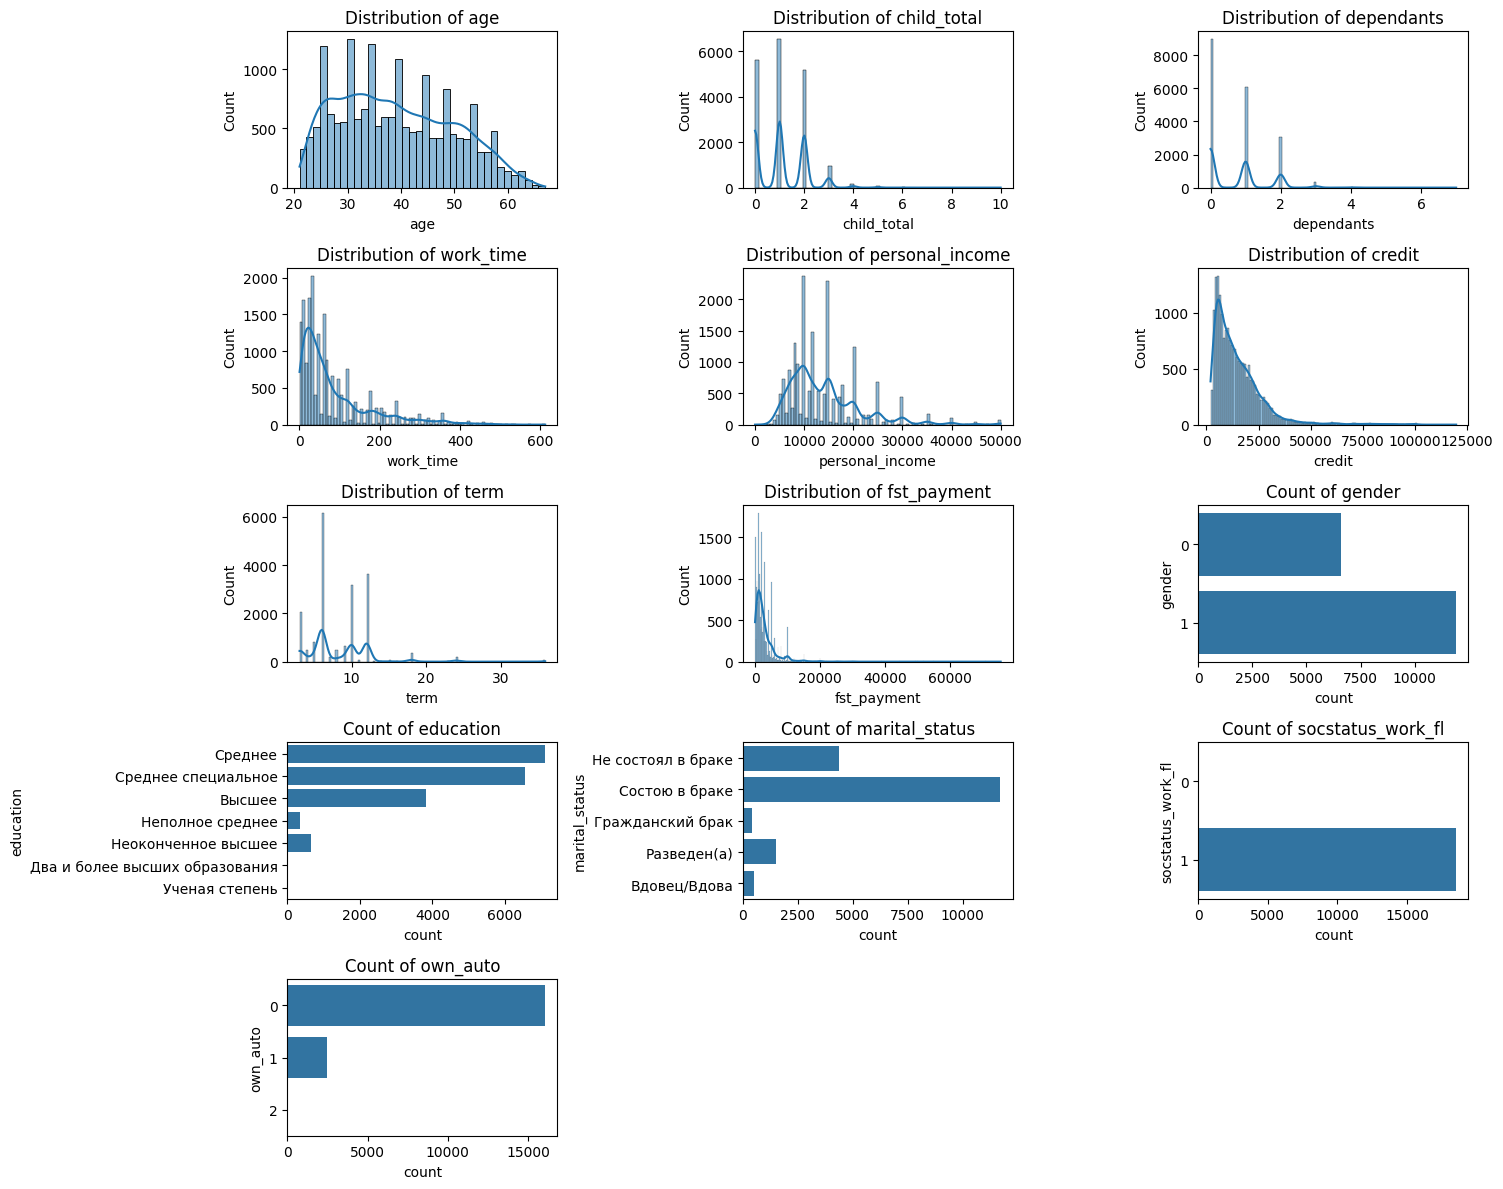

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the size of the overall figure
plt.figure(figsize=(15, 12))

# Numerical and Categorical columns for plotting
numerical_columns = ['age', 'child_total', 'dependants', 'work_time', 'personal_income', 'credit', 'term', 'fst_payment']
categorical_columns = ['gender', 'education', 'marital_status', 'socstatus_work_fl', 'own_auto']

total_plots = len(numerical_columns) + len(categorical_columns)
cols = 3  # Number of columns in subplot
rows = total_plots // cols + (total_plots % cols > 0)  # Calculating the number of rows needed

# Plotting Numerical Columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

# Plotting Categorical Columns
for i, column in enumerate(categorical_columns, len(numerical_columns) + 1):
    plt.subplot(rows, cols, i)
    sns.countplot(y=column, data=df)
    plt.title(f'Count of {column}')

plt.tight_layout()
plt.show()


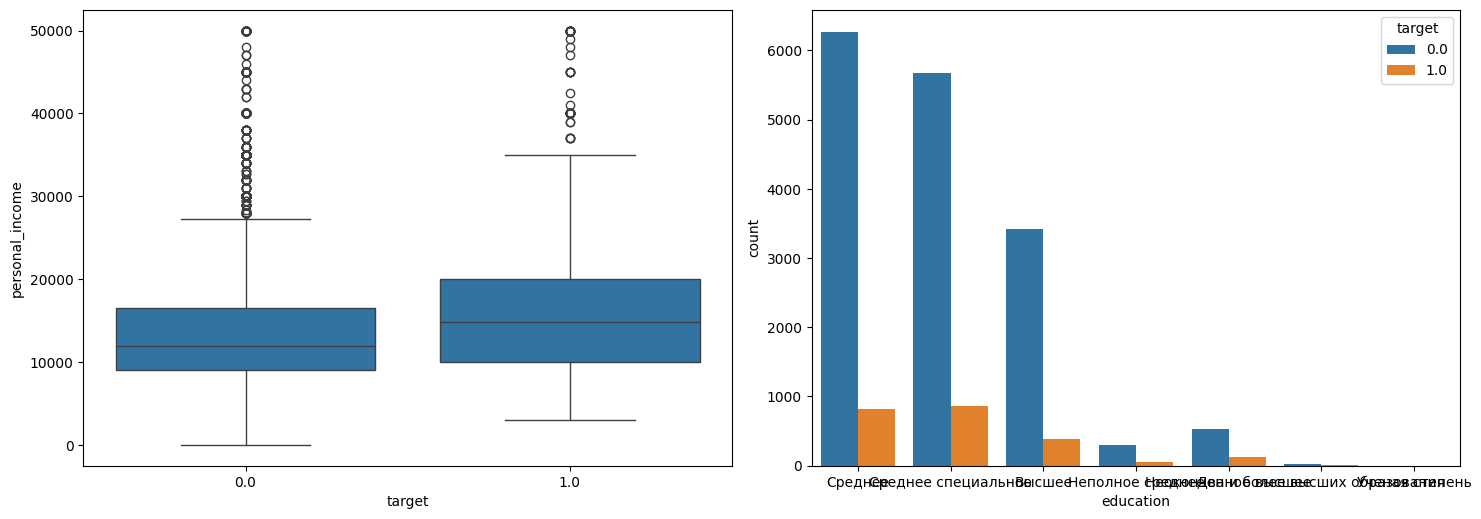

Inconsistencies in 'child_total' and 'dependants':
       child_total  dependants
0                1           0
2                2           0
7                1           0
8                1           0
9                1           0
...            ...         ...
18478            2           0
18479            2           0
18480            2           0
18481            2           1
18482            1           0

[4554 rows x 2 columns]


In [23]:
# Bivariate Analysis Example: Target variable against some key features
# Adjust the figure size as needed
plt.figure(figsize=(15, 10))

# Example of plotting a numerical variable against the target
plt.subplot(2, 2, 1)
sns.boxplot(x='target', y='personal_income', data=df)

# Example of plotting a categorical variable against the target
plt.subplot(2, 2, 2)
sns.countplot(x='education', hue='target', data=df)

plt.tight_layout()
plt.show()

# Checking for Inconsistencies
# Example: Checking if 'child_total' is greater than 'dependants' (which might be an inconsistency)
inconsistency_mask = df['child_total'] > df['dependants']
inconsistent_data = df[inconsistency_mask]
print("Inconsistencies in 'child_total' and 'dependants':")
print(inconsistent_data[['child_total', 'dependants']])

In [ ]:
# 1. Logical Inconsistencies
# Example: Ensuring 'work_time' is reasonable for the 'age' of the individual
# Assuming work_time is in months and one starts working at 18 years of age
max_work_time = (df['age'] - 18) * 12  # Max work time in months
logical_inconsistency_mask = df['work_time'] > max_work_time
logical_inconsistencies = df[logical_inconsistency_mask]
print("Logical Inconsistencies in 'work_time' and 'age':")
print(logical_inconsistencies[['age', 'work_time']])

# 2. Outliers Detection
# Example: Detecting outliers in 'personal_income'
q1 = df['personal_income'].quantile(0.25)
q3 = df['personal_income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_mask = (df['personal_income'] < lower_bound) | (df['personal_income'] > upper_bound)
outliers = df[outliers_mask]
print("Outliers in 'personal_income':")
print(outliers['personal_income'])


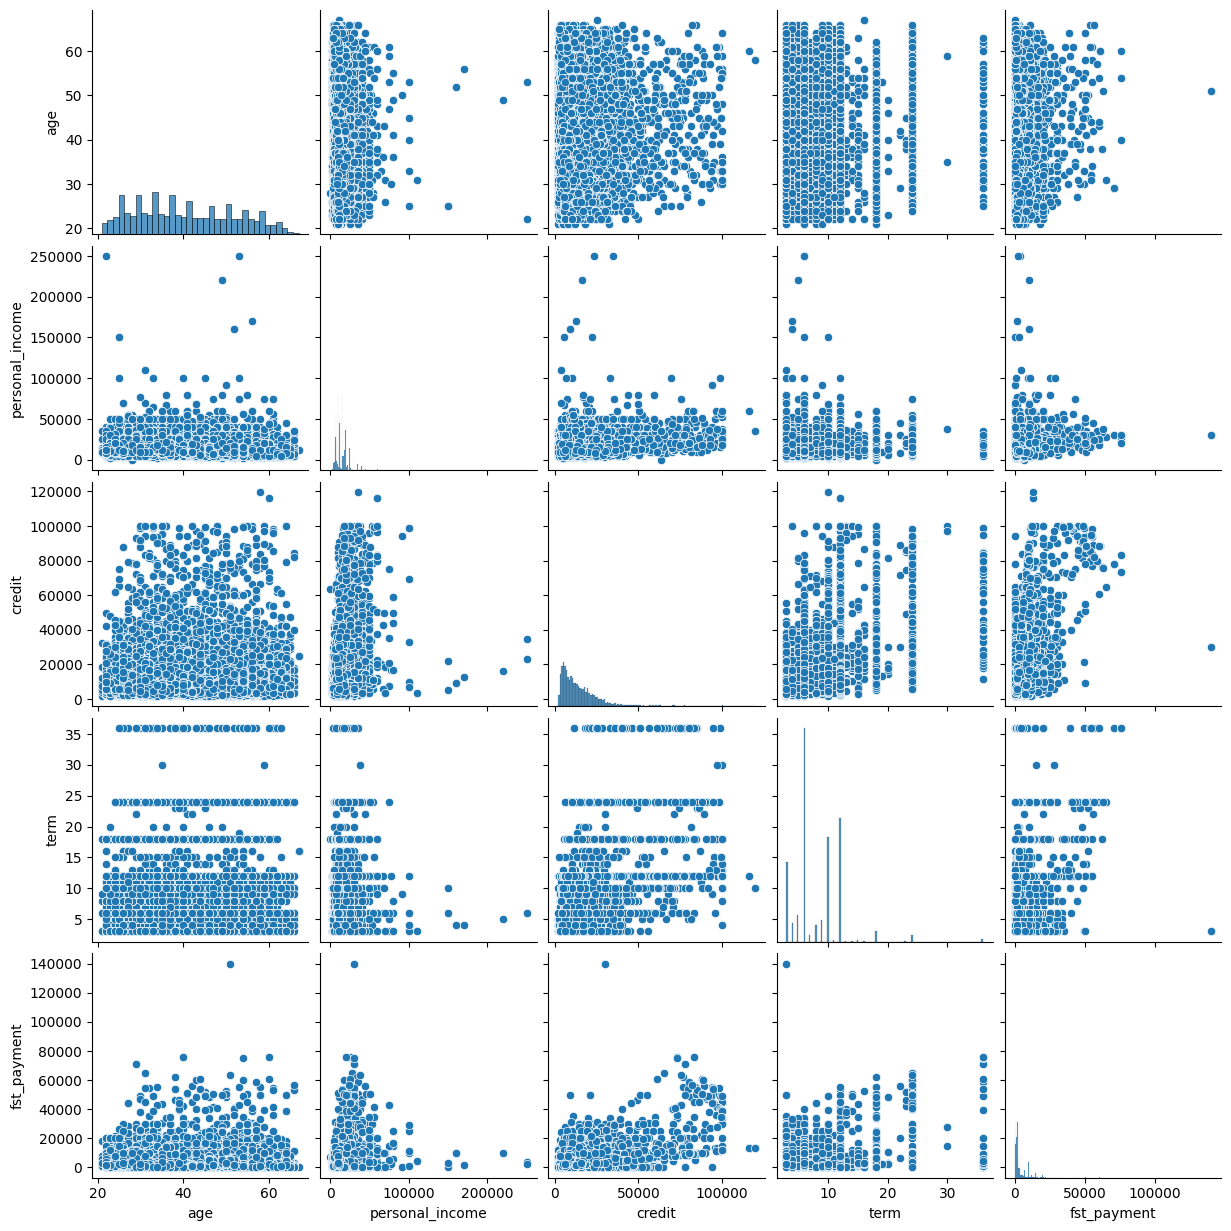

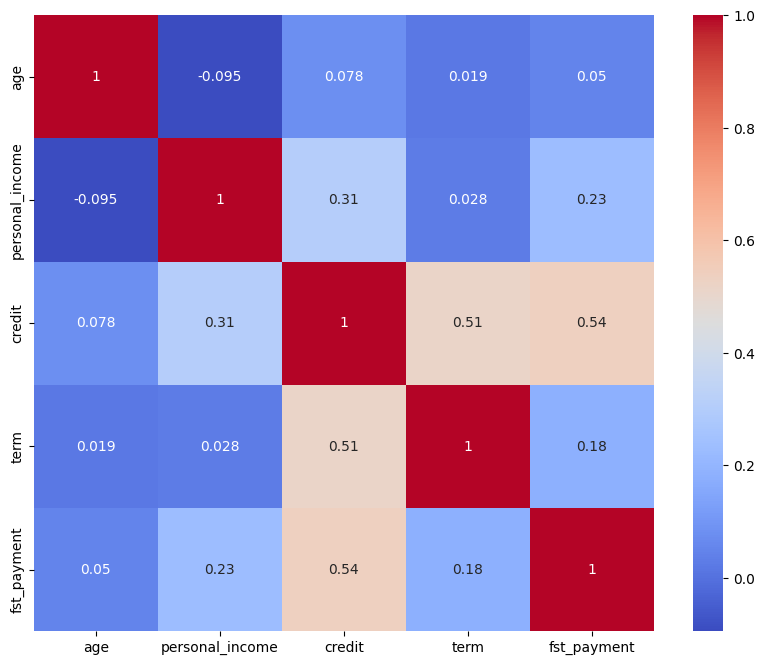

In [60]:
# Pair Plot for Selected Numerical Features
selected_features = ['age', 'personal_income', 'credit', 'term', 'fst_payment']
sns.pairplot(df[selected_features])
plt.show()

# Correlation Heatmap
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
